<a href="https://colab.research.google.com/github/jimmyv117/IS-4487/blob/main/Week_10_and_11_Assignment_Modeling_with_Classification_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


In [19]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/adviseinvest.csv')

Mounted at /content/gdrive


In [3]:
calls_answered = df['answered'].sum()  # Total calls answered
calls_not_answered = len(df) - calls_answered  # Total calls not answered

print("Total calls answered:", calls_answered)
print("Total calls not answered:", calls_not_answered)

Total calls answered: 16128
Total calls not answered: 13376


In [4]:
# Selecting the features and target variable
X = df[['income']] # Feature variable
y = df['answered'] # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the decision tree model with a max depth of 2
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = tree_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the income model:", round(accuracy, 3))

Accuracy of the income model: 0.612


In [5]:
# Proportions of observations in each child node
p_c1 = sum(X_train['income'] >= 39135) / len(X_train)
p_c2 = 1 - p_c1

# Entropy of the parent node
p1_parent = sum(y_train) / len(y_train)
p2_parent = 1 - p1_parent
entropy_parent = - (p1_parent * np.log2(p1_parent) + p2_parent * np.log2(p2_parent))

# Entropy of the first child node
y_c1 = y_train[X_train['income'] >= 39135]
p1_c1 = sum(y_c1) / len(y_c1)
p2_c1 = 1 - p1_c1
entropy_c1 = - (p1_c1 * np.log2(p1_c1) + p2_c1 * np.log2(p2_c1))

# Entropy of the second child node
y_c2 = y_train[X_train['income'] < 39135]
p1_c2 = sum(y_c2) / len(y_c2)
p2_c2 = 1 - p1_c2
entropy_c2 = - (p1_c2 * np.log2(p1_c2) + p2_c2 * np.log2(p2_c2))

# Calculating information gain
IG = entropy_parent - (p_c1 * entropy_c1 + p_c2 * entropy_c2)


!pip install graphviz

!dot -Tpng tree.dot -o tree.pngprint("Information Gain:", round(IG, 3))

Information Gain: 0.037


Top 3 most important predictors:
    Feature  Importance
0    income    0.363102
2       age    0.196800
8  chk_acct    0.178554


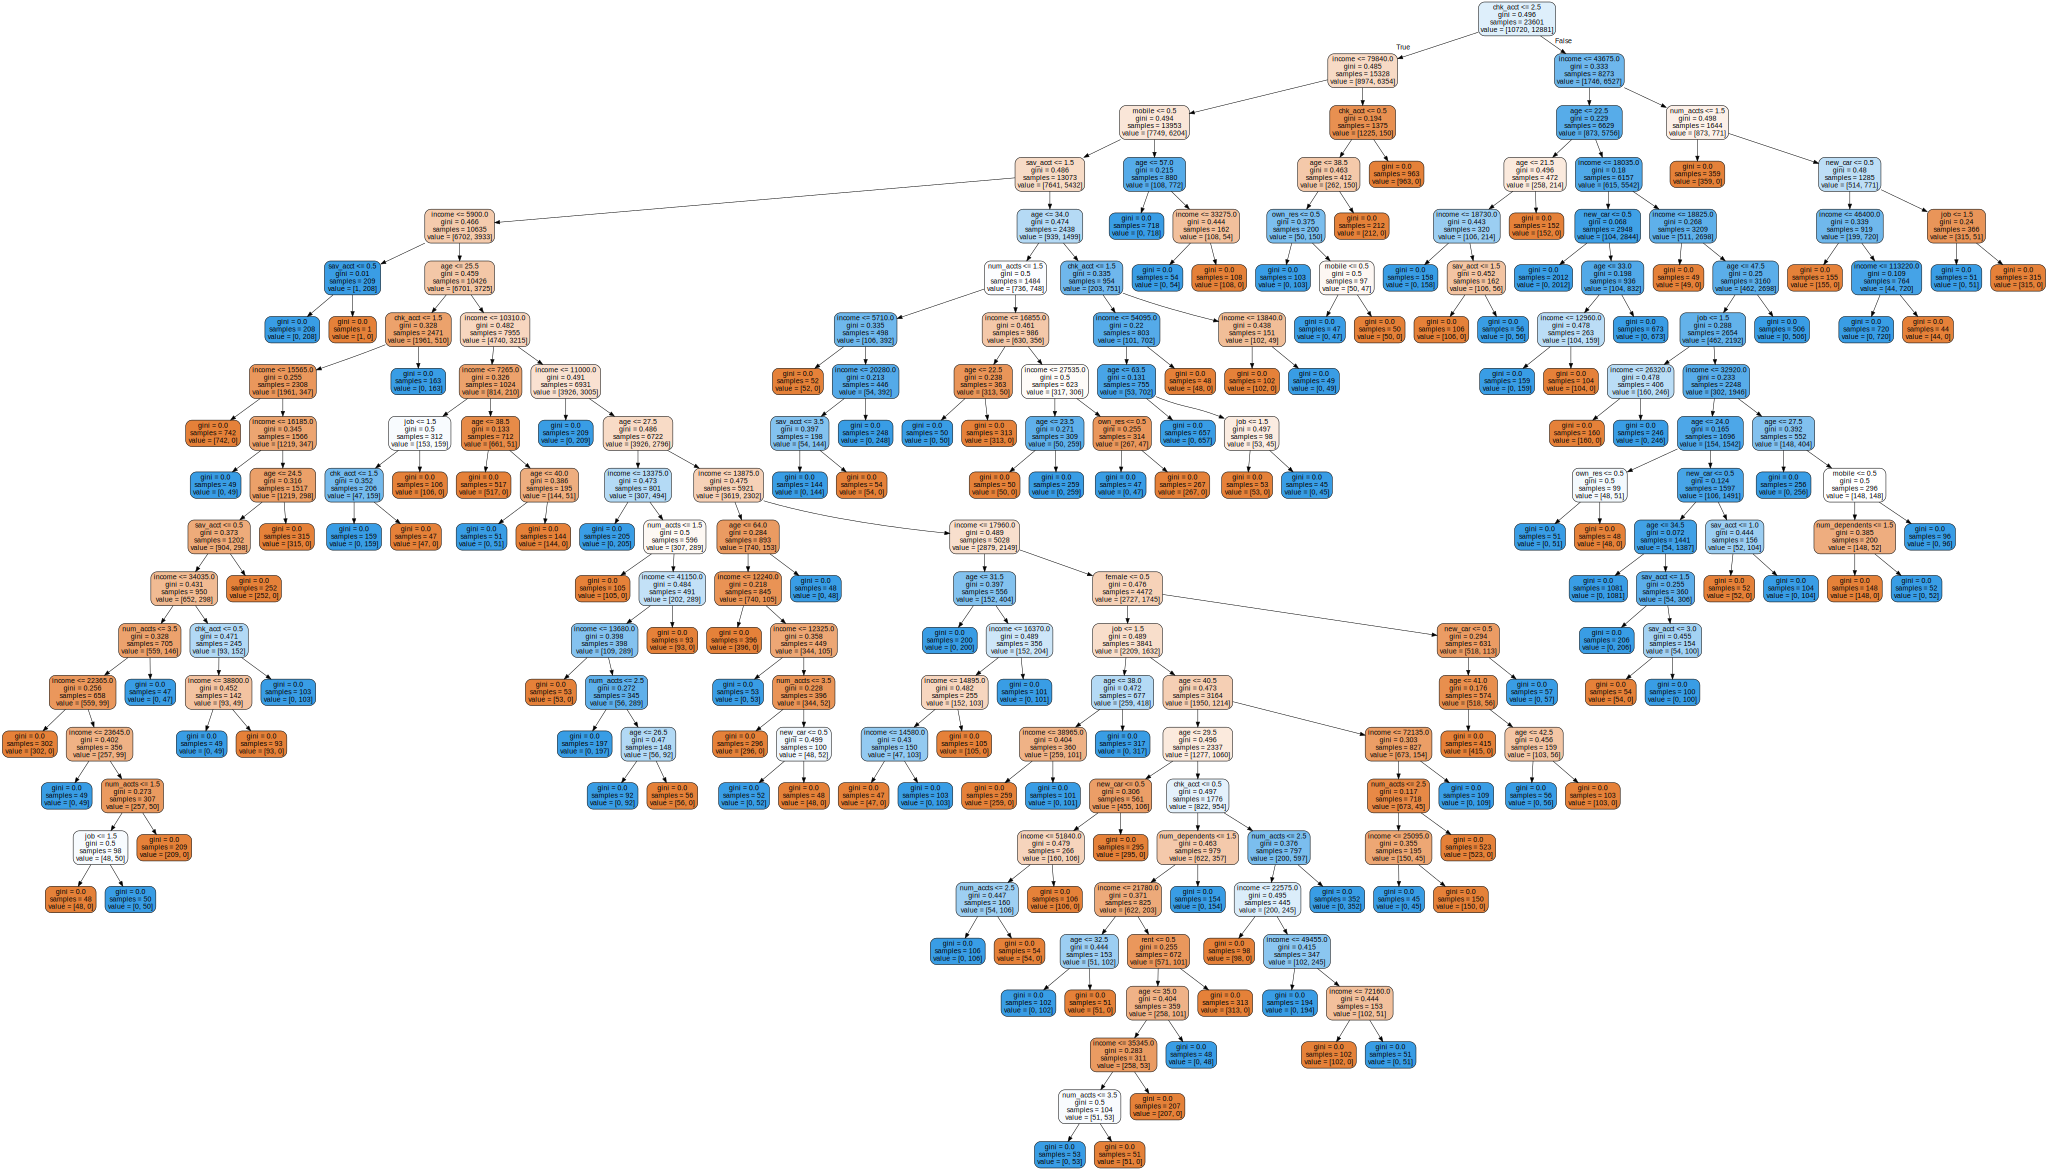

In [22]:
!pip install graphviz

!dot -Tpng tree.dot -o tree.png
# Drop rows with missing values
df.dropna(inplace=True)

# Fit a new decision tree model using all predictors
X = df.drop(['answered', 'product'], axis=1)  # Excluding 'answered' and 'product' from predictors
y = df['answered']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Visualizing the tree with more legible settings
mpl.rcParams['figure.figsize'] = (20, 10)  # Adjusting figure size for better visualization
export_graphviz(tree_model, out_file='tree.dot', feature_names=X.columns, filled=True, rounded=True)

# Identifying top 3 most important predictors
importance = tree_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
top_3_predictors = feature_importance.sort_values(by='Importance', ascending=False).head(3)
print("Top 3 most important predictors:")
print(top_3_predictors)

from graphviz import Source

# Load the .dot file and display the decision tree
tree_graph = Source(export_graphviz(tree_model, out_file=None, feature_names=X.columns, filled=True, rounded=True))
tree_graph.format = 'png'  # Set the output format to PNG
tree_graph.render('tree_model', view=True)  # Render and display the tree

tree_graph.render(view=True)

from graphviz import Source

# Fit a new decision tree model using all predictors
X = df.drop(['answered', 'product'], axis=1)  # Excluding 'answered' and 'product' from predictors
y = df['answered']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Visualizing the tree with more legible settings
tree_graph = Source(export_graphviz(tree_model, out_file=None, feature_names=X.columns, filled=True, rounded=True))
tree_graph